In [2]:
# 读取数据

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
% matplotlib inline

sns.set_style("whitegrid")

dataset = np.loadtxt(
    "E:\Workspace\jupyter_notebook\\notebook_idata_lesson01\Xgboost\pima-indians-diabetes.csv",
    delimiter=","
)
x = dataset[:, 0:8]
y = dataset[:, 8]

print(x[:3])
print(y[:3])


[[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]
 [  1.     85.     66.     29.      0.     26.6     0.351  31.   ]
 [  8.    183.     64.      0.      0.     23.3     0.672  32.   ]]
[1. 0. 1.]


In [3]:
# 切分训练集和数据集
from sklearn.model_selection import train_test_split

rand_seed = 7
test_size = 0.33
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=rand_seed)


In [5]:
# xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

# 查看预测结果
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# 可以看到正确率是77.95%


Accuracy: 77.95%


D:\Coding\Anaconda3\envs\idata\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [6]:
# 查看xgboost每步的结果

model = XGBClassifier()
eval_set = [(x_test, y_test)]
model.fit(x_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# 可以每步之后的loss
# early_stopping_rounds表示，连续几次loss都没有下降就停止


[0]	validation_0-logloss:0.660186


Will train until validation_0-logloss hasn't improved in 10 rounds.


[1]	validation_0-logloss:0.634854


[2]	validation_0-logloss:0.612239


[3]	validation_0-logloss:0.593118


[4]	validation_0-logloss:0.578303


[5]	validation_0-logloss:0.564942


[6]	validation_0-logloss:0.555113


[7]	validation_0-logloss:0.54499


[8]	validation_0-logloss:0.539151


[9]	validation_0-logloss:0.531819


[10]	validation_0-logloss:0.526065


[11]	validation_0-logloss:0.51977


[12]	validation_0-logloss:0.514979


[13]	validation_0-logloss:0.50927


[14]	validation_0-logloss:0.506086


[15]	validation_0-logloss:0.503565


[16]	validation_0-logloss:0.503591


[17]	validation_0-logloss:0.500805


[18]	validation_0-logloss:0.497605


[19]	validation_0-logloss:0.495328


[20]	validation_0-logloss:0.494777


[21]	validation_0-logloss:0.494274


[22]	validation_0-logloss:0.493333


[23]	validation_0-logloss:0.492211


[24]	validation_0-logloss:0.491936


[25]	validation_0-logloss:0.490578


[26]	validation_0-logloss:0.490895


[27]	validation_0-logloss:0.490646


[28]	validation_0-logloss:0.491911


[29]	validation_0-logloss:0.491407


[30]	validation_0-logloss:0.488828


[31]	validation_0-logloss:0.487867


[32]	validation_0-logloss:0.487297


[33]	validation_0-logloss:0.487562


[34]	validation_0-logloss:0.487788


[35]	validation_0-logloss:0.487962


[36]	validation_0-logloss:0.488218


[37]	validation_0-logloss:0.489582


[38]	validation_0-logloss:0.489334


[39]	validation_0-logloss:0.490969


[40]	validation_0-logloss:0.48978


[41]	validation_0-logloss:0.490704


[42]	validation_0-logloss:0.492369


Stopping. Best iteration:
[32]	validation_0-logloss:0.487297



Accuracy: 78.35%


D:\Coding\Anaconda3\envs\idata\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


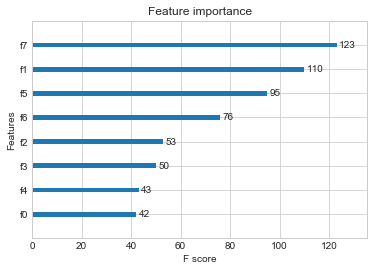

In [10]:
# 查看特征值的重要性
from xgboost import plot_importance

model = XGBClassifier()
model.fit(x_train, y_train)
plot_importance(model)
plt.show()


In [11]:
# 找出较好的参数
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
# 交叉验证
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(x, y)

# 查看结果
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print("%f  with: %r" % (mean, param))


Best: -0.483304 using {'learning_rate': 0.1}
-0.689811  with: {'learning_rate': 0.0001}
-0.661827  with: {'learning_rate': 0.001}
-0.531155  with: {'learning_rate': 0.01}
-0.483304  with: {'learning_rate': 0.1}
-0.515642  with: {'learning_rate': 0.2}
-0.554158  with: {'learning_rate': 0.3}
